# Esercitazione 2

Nella cartella di questa esercitazione ci sono:
- __<font color=red> Inserire...</font>__

__<font color=red> Inserire immagine</font>__

Questa esercitazione è divisa in:
1. Integrale Monte Carlo.
2. Random walks.

Questi comandi servono ad importare le librerie necessarie per il notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 1 Integrale Monte Carlo

L'integrazione Monte Carlo consiste nel stimare l'integrale di una funzione $f(x)$ come limite di una sommatoria, cioè
$$
I=\int_a^b f(x)\,dx= (b-a)\lim_{N\to+\infty}\frac{1}{N}\sum_{i=0}^Nf(x_i)=(b-a)\langle f\rangle_{[a,b]}

Quindi se utilizziamo $N\to\infty$ elementi abbiamo che:
$$
I\approx (b-a)\frac{1}{N}\sum_{i=0}^N f(x_i)

Definiamo la funzione $f(x)$ come $f(x)=g(x)\,p(x)$ nel dominio $\Omega$, dove:
- $g(x)$ è una funzione.
- $p(x)$ è una distribuzione di probabilità, quindi è definita non negativa ed e normalizzata a $1$.

Così l'integrale di partenza diventa:
$$
I=\int_\Omega g(x)\,p(x)\,dx=\langle g \rangle_{\Omega}
$$

Definiamo:
$$
G_N=\frac{1}{N}\sum_{i=0}^Ng(x_i)
$$

Notiamo che  $G_N$ stima $I$ con un errore $\varepsilon=\frac{\sigma_I}{\sqrt{N-1}}$.

Utilizzeremo questo metodo per stimare l'integrale:
$$
I=\int_0^1 \frac{\pi}{2} \cos{\left(\frac{\pi}{2}\,x\right)}\,dx
$$

Per stimare, l'integrale estraiamo $M$ <font color=red>*</font> numeri con diverse distribuzioni di probabilità per avere altrettanti valori di $g(x)$.  Dividiamo i vlaori di $g(x)$ in $N=100$ blocchi e per ciascun blocco calcoliamo la media.  Calcoliamo la media e la varianza $\sigma_I^2$ delle medie ottenute, per ottenere le stime dell'integrale $I$ ed il suo errore $\varepsilon$.

In [3]:
#Definisco la funzione da integrare
def f(x):
    return np.pi/2*np.cos(np.pi/2*x)

Questo integrale lo possiamo risolvere analiticamente per verificare i nostri risultati: $I=1$.

### 1.1 Distribuzione Uniforme

Iniziamo utilizzando la distribuzione di probabilità uniforme, $p(x)=\frac{1}{b-a}$.

Nel caso in esame abbiamo:
- $p(x)=1$ .
- $g(x)=\frac{\pi}{2} \, \cos\left(\frac{\pi}{2}\,x\right)$ .

La nostra stima diventa:
$$
I\approx \frac{1}{N}\sum_{i=0}^Ng(x_i)=\frac{1}{N}\sum_{i=0}^N\frac{\pi}{2}\,\cos{\left(\frac{\pi}{2}\,x_i\right)}
$$

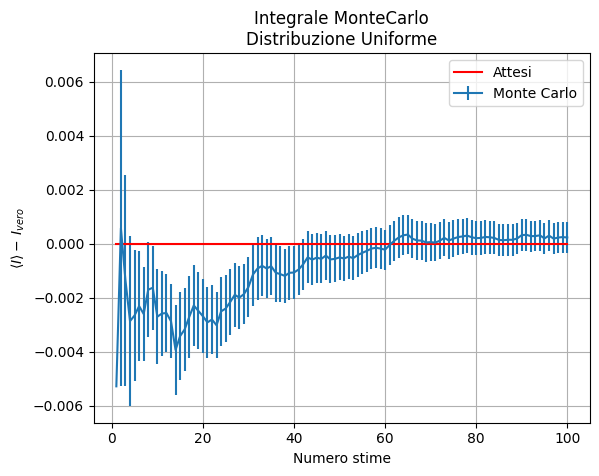

In [22]:
#Carica dati
data=np.loadtxt("uniform.dat")
#Valori dell'ascissa

#Grafico con errore
plt.errorbar(data[:,0], data[:,2],yerr=data[:,3],label="Monte Carlo")
plt.plot(data[:,0],np.zeros(100),label="Attesi",color="red")
#Parte estetica
plt.xlabel("Numero stime")
plt.ylabel(r"$\langle I \rangle -\, I_{vero}$")
plt.title(f"Integrale MonteCarlo\nDistribuzione Uniforme")
plt.legend()
plt.grid(True)

plt.show()

Riusciamo ad ottenere dei risultati compatibili con il valore vero, però questo metodo può dimostrarsi inefficace per funzioni più complesse o in spazi con svariete dimensioni.

### 1.2 Importance Sampling

Possiamo trovare delle distribuzioni di probabilità che funzionino meglio?

Prendiamo in considerazione un'altra distribuzione $d(x)$ ignota.  Se moltiplichiamo e dividiamo l'integranda per questa distribuzione teniamo invariato il risultato dell'integrale, ma abbiamo che:

$$
I=\int_\Omega\left[ \frac{g(x)\,p(x)}{d(x)} \right]\,d(x)\,dx=\left\langle \frac{g(x)\,p(x)}{d(x)} \right\rangle_\Omega
$$

Ciò vuol dire che posso usare una distribuzione più comoda per campionare il mio dominio.

Usando $d(x)=\frac{g(x)\,p(x)}{I}$, abbiamo:

$$
I=\frac{1}{N}\sum\left[\frac{g(x)\,p(x)}{g(x)\,p(x)}\right]\cdot I
$$

Notiamo che questa è una identità quindi con questa distribuzione qualsiasi estrazione mi restituisce il valore di $I$.  Questa distribuzione riscontra un problema visto che per stimare $I$ utilizzo il questo stesso valore.

Grazie a queste considerazioni possiamo provare ad usare funzioni semplici da integrare, che approssimano bene la funzione in esame e normalizzarle per vedere se sono distribuzioni più efficienti.

Facciamo lo sviluppo in __serie di Taylor al primo ordine__ della funzione che vogliamo integrare, per non fare annullare la derivata prima scegliamo di svilupparla intorno ad $1$:
$$
f(x)=\frac{\pi}{2}\, \cos\left(\frac{\pi}{2}\,x\right)\approx \frac{\pi^2}{4}-\frac{\pi^2}{4}x
$$

In [7]:
#Definisco la funzione che approssima
def taylor(x):
    return (np.pi/2)**2*(1-x)

Proviamo a confrontare le due funzioni.

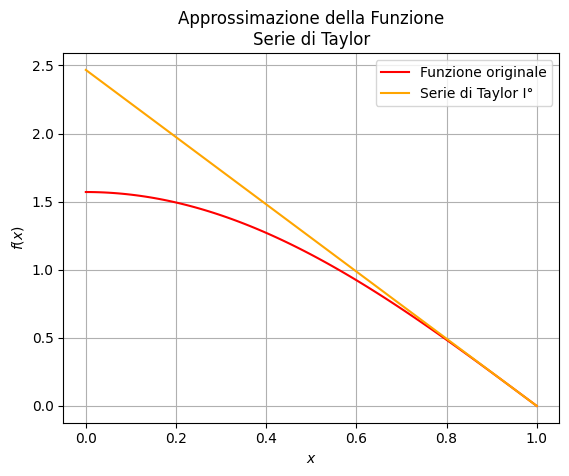

In [21]:
#Creo una list di ascisse
x=np.linspace(0,1,100)

#Plotto i due grafici
plt.plot(x,f(x),label="Funzione originale",color="red")
plt.plot(x,taylor(x),label="Serie di Taylor I°",color="orange")

#Parte estetica
plt.grid(True)
plt.legend()
plt.title(f"Approssimazione della Funzione\nSerie di Taylor")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")

plt.show()

Si vede che la serie di Taylor approssima molto bene l'andamento della funzione intorno ad $1$ e indica solo l'andamento generale per il resto.

Integrando la funzione ottenuta abbiamo:
$$
\int_0^1\frac{\pi^2}{4}\,(1-x)\,dx=\frac{\pi^2}{8}
$$

Adesso possiamo definire la distribuzione del campionamentoe la funzione da campionare:
$$
d(x)=2\,(1-x)
$$
$$
\frac{g(x)\,p(x)}{d(x)}=\frac{\pi\,\cos\left(\frac{\pi}{2}\,x\right)}{4\,(1-x)}

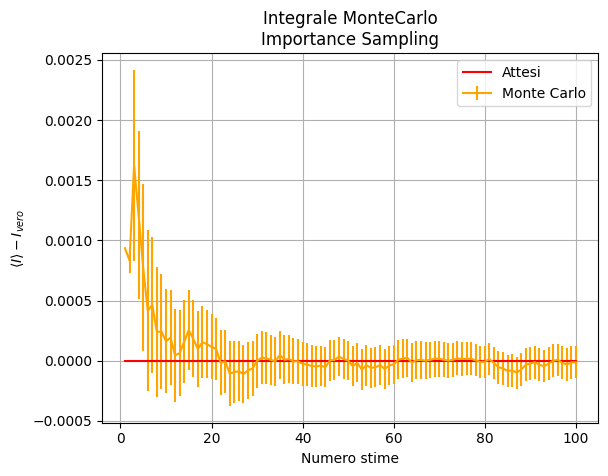

In [28]:
#Carica dati
data=np.loadtxt("importance.dat")

#Grafico con errore
plt.errorbar(data[:,0], data[:,2],yerr=data[:,3],label="Monte Carlo",color="orange")
plt.plot(data[:,0],np.zeros(100),label="Attesi",color="red")
#Parte estetica
plt.xlabel("Numero stime")
plt.ylabel(r"$\langle I \rangle -I_{vero}$")
plt.title(f"Integrale MonteCarlo\nImportance Sampling")
plt.legend()
plt.grid(True)

plt.show()

Anche in questo caso abbiamo trovato risultati compatibili con il valore vero.

### 1.3 Confronto

Adesso vediamo un confronto tra le due diverse distribuzioni e vadiamo come funzionano in comparazione.

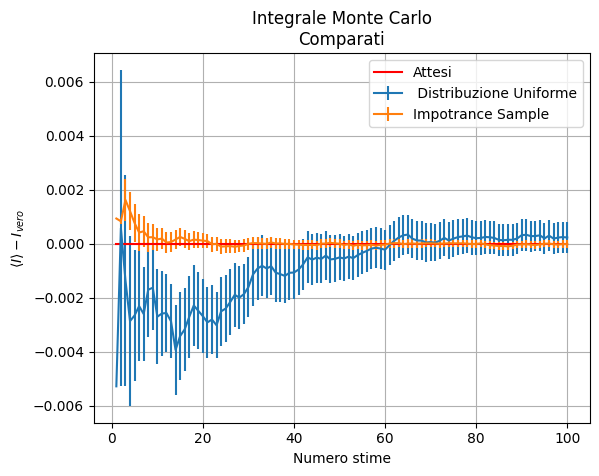

In [29]:
#Carica dati
data=np.loadtxt("uniform.dat")
data1=np.loadtxt("importance.dat")
#Valori dell'ascissa
x=np.array([i+1 for i in range(100)])

#Grafico con errore
plt.errorbar(data[:,0], data[:,2],yerr=data[:,3],label=" Distribuzione Uniforme")
plt.errorbar(data1[:,0], data1[:,2],yerr=data1[:,3],label="Impotrance Sample")
plt.plot(data[:,0],np.zeros(100),label="Attesi",color="red")
#Parte estetica
plt.xlabel("Numero stime")
plt.ylabel(r"$\langle I \rangle-I_{vero} $")
plt.title(f"Integrale Monte Carlo\nComparati")
plt.legend()
plt.grid(True)

plt.show()

Notiamo che entrambi arrivano allo stesso risultato però l'importance sampling risulta più preciso ed accurato che il metodo con la distribuzione uniforme.

## 2 Random Walks

I __random walks__, o *cammini aleatori*, è un formalismo matematico che consiste in traiettorie dove si fanno passi casuali.  I RW possono essere di vari tipi i due che prenderemo in esame saranno sempre $3D$ ma con un movimento differente:
1. Su un reticolo.
2. Libero di muoversi nello spazio.

La varianza della posizione è lineare quindi ci aspettiamo che $\sqrt{\langle |r_N|^2\rangle_{RW}}$ vada come $\sqrt{N}$.

### 2.1 Reticolo

Iniziamo con il reticolo quindi i passi possono essere soltanto lungo i tre assi ed ogni passo deve essere per forza di un'unità.

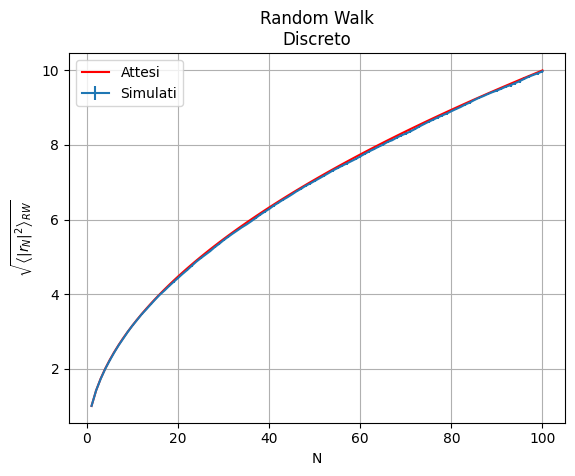

In [25]:
#Carico dati da file e inizializzo le ascisse
data=np.loadtxt("RandomWalk.dat")
dim=np.shape(data)[0]
x=np.linspace(1,dim,dim)

#Faccio un fit dei dati
def my_func(x,k):
    return k*np.sqrt(x)
popt, pcov=curve_fit(my_func,x,data[:,0],sigma=data[:,2])

#Plotto i dati
plt.errorbar(x,data[:,0],yerr=data[:,2],label="Simulati")
plt.plot(x,my_func(x,popt),color="red",label="Attesi")

#Estetica
plt.title(f"Random Walk\nDiscreto")
plt.xlabel("N")
plt.ylabel(r"$\sqrt{\left\langle|r_N|^2\right\rangle_{RW}}$")
plt.legend()
plt.grid(True)

plt.show()

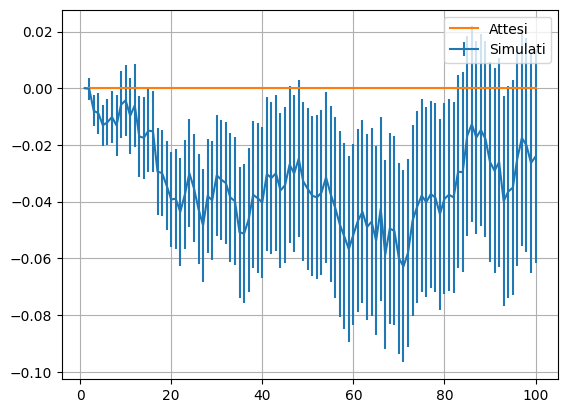

In [26]:
plt.errorbar(x,data[:,0]-my_func(x,popt),yerr=data[:,2],label="Simulati")
plt.plot(x,np.zeros(dim),label="Attesi")
plt.grid()
plt.legend()

plt.show()

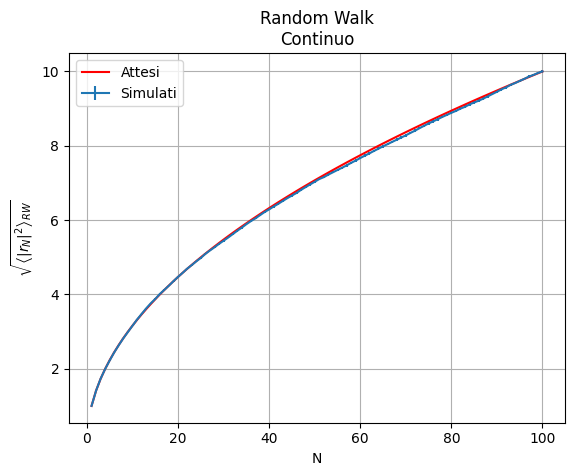

In [27]:
#Faccio un fit dei dati
cpopt, pcov=curve_fit(my_func,x,data[:,1],sigma=data[:,3])

#Plotto i dati
plt.errorbar(x,data[:,1],yerr=data[:,3],label="Simulati")
plt.plot(x,my_func(x,cpopt),color="red",label="Attesi")

#Estetica
plt.title(f"Random Walk\nContinuo")
plt.xlabel("N")
plt.ylabel(r"$\sqrt{\left\langle|r_N|^2\right\rangle_{RW}}$")
plt.legend()
plt.grid(True)

plt.show()

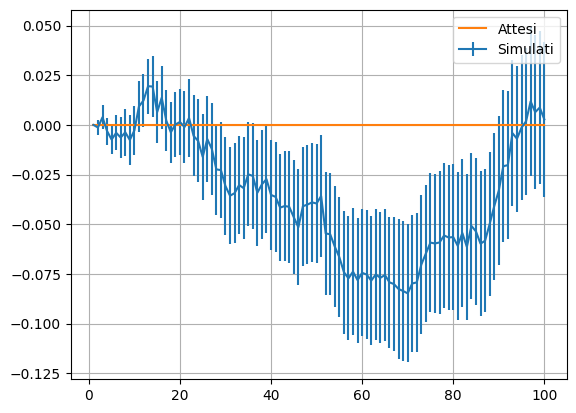

In [28]:
plt.errorbar(x,data[:,1]-my_func(x,cpopt),yerr=data[:,3],label="Simulati")
plt.plot(x,np.zeros(dim),label="Attesi")
plt.grid()
plt.legend()

plt.show()